# Automated Data Collection Tool
**Authors:** Unaisa Islam, Dickson Owuor, Daisy Kipto, Raymond Cao

July 2025

## Main Goal

To write a function that will take as input: (1) a CSV file with image filters and (2) microscopy images. The function will apply filters to the images to produce graph images. The images will be later labeled as good/bad in order to be used to train a CNN model to detect/predict good and bad graph images.

### 1. Import Libraries

In [4]:
# Installing Libraries (if not installed)
#!pip3 install matplotlib
#!pip3 install sgtlib
#!pip3 install seaborn
#!pip3 install numpy
#!pip3 install pandas

  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp313-cp313-macosx_10_13_universal2.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached numpy-2.3.1-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.4-cp313-cp313-macosx_10_13_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
Using cached numpy-2

In [8]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

from sgtlib import modules as sgt

### 2. Get CSV file and Image Folder

In [9]:
# Read CSV file into a Pandas DataFram

filter_df = pd.read_csv('filters.csv')
filter_df.head()

,file_name,Adaptive Kernel,Global Threshold,OTSU,Dark FG,Autolevel,Gaussian Kernel,Laplacian,Sobel,Median,Scharr,Lowpass Window,Gamma,result
0,ANF copy.jpeg,21.0,NaN,NaN,NaN,7.0,7.0,NaN,NaN,True,NaN,3.0,0.94,G
1,ANF copy.jpeg,23.0,NaN,NaN,NaN,7.0,7.0,NaN,NaN,True,NaN,4.0,0.94,G
2,ANF copy.jpeg,25.0,NaN,NaN,NaN,7.0,7.0,NaN,NaN,True,NaN,3.0,0.97,G
3,ANF copy.jpeg,23.0,NaN,NaN,NaN,7.0,7.0,NaN,NaN,True,NaN,3.0,0.93,G
4,ANF copy.jpeg,11.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,True,NaN,2.0,0.85,B


In [10]:
# Load images folder
data_dir = 'images'
os.listdir(data_dir)
print(os.listdir(data_dir))

['Sample3 SE_InL_002 - Small.tif', 'b-loofah', 'e-eggplant', 'Sample6 BSE_010 - Small.tif', 'i-squid', 'rGO.jpeg', '.DS_Store', 'Sample3 BSE_017.tif', 'Sample6 SE_InL_002 - Small.tif', 'CANF.jpeg', 'sgt_files', 'CCF.jpeg', 'Sample3 BSE_018 - Small.tif', 'FCF.jpeg', 'd-mushroom', 'f-jujube', 'h-sea cucumber', 'Sample3 SE_InL_003 - Small.tif', 'c-pomelo peel', 'Sample6 SE_InL_007.tif', 'a-sunflower receptacle', 'Sample6 SE_InL_006.tif', 'j-nude mouse lung', 'Sample3 BSE_017 - Small.tif', 'ANF.jpeg', 'Sample6 SE_InL_003 - Small.tif', 'CANN.jpeg', 'g-sponge', 'Sample6 SE_InL_002.tif']


(664, 912, 3)


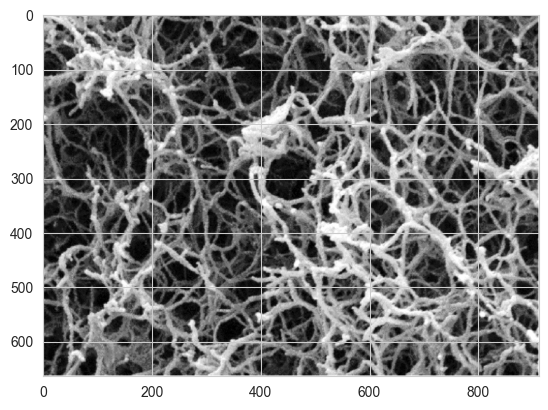

In [11]:
# Check out images

img = mpimg.imread('images/ANF.jpeg')
print(img.shape)
plt.imshow(img)

### 3. Run StructuralGT

* Identify and set paths to image(s) and config file

In [12]:
# set paths
img_path = "images/ANF.jpeg"
cfg_file = "sgt_configs.ini"   # Optional: leave blank

* Define a function that will allow you to receive live updates from StructuralGT (as it is running)

In [13]:
# Define a function for receiving progress updates
def print_updates(progress_val, progress_msg):
    print(f"{progress_val}: {progress_msg}")

* Create an object that will take as input the config file and image and apply image filter

In [14]:
# Create a Network object
ntwk_obj, _ = sgt.ImageProcessor.create_imp_object(img_path)

* Update image filter options

In [23]:
sel_img_batch = ntwk_obj.get_selected_batch()
img_obj = sel_img_batch.images[0]
print(f"Old Threshold Type: {img_obj.configs["threshold_type"]["value"]}")

img_obj.configs["threshold_type"]["value"] = 1
print(f"New Threshold Type: {img_obj.configs["threshold_type"]["value"]}")

Old Threshold Type: 0
New Threshold Type: 1


* Apply image filters according to config file

In [24]:
# Apply image filters according to cfg_file
ntwk_obj.add_listener(print_updates)
ntwk_obj.apply_img_filters()
ntwk_obj.remove_listener(print_updates)

10: Processing image...
99.0: Image processing in progress...
100: Image processing complete...


In [25]:
# Get images
sel_img_batch = ntwk_obj.get_selected_batch()
bin_images = [obj.img_bin for obj in sel_img_batch.images]
mod_images = [obj.img_mod for obj in sel_img_batch.images]

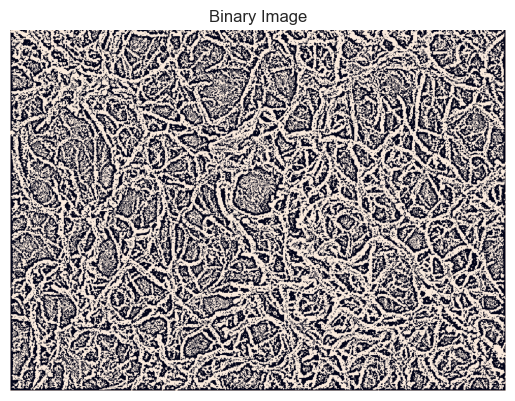

In [26]:
# View images
plt.imshow(bin_images[0])
plt.axis('off')  # Optional: Turn off axis ticks and labels for a cleaner image display
plt.title('Binary Image')
plt.show()

* Extract the graph

In [27]:
# Extract graph
ntwk_obj.add_listener(print_updates)
ntwk_obj.build_graph_network()
ntwk_obj.remove_listener(print_updates)

0: Starting graph extraction...
50: Extracting the graph network...
51: Build graph skeleton from binary image...
52: Ran merge_nodes for image skeleton...
54: Ran remove_small_objects for image skeleton...
56: Ran prune_dangling_edges for image skeleton...
60: Creating graph network...
64: Removing self loops from graph network...
66: Assigning weights to graph network...
75: Verifying graph network...
77: Retrieving graph properties...
78: Identifying graph subcomponents...
80: Storing graph properties...
90: Saving graph network...
95: Plotting graph network...


* View the graph image

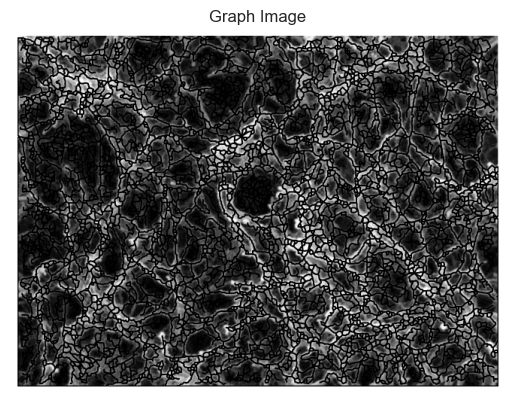

In [28]:
# View graph
net_images = [sel_img_batch.graph_obj.img_ntwk]
plt.imshow(net_images[0])
plt.axis('off')  # Optional: Turn off axis ticks and labels for a cleaner image display
plt.title('Graph Image')
plt.show()